# Data Preparation

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

from sklearn.preprocessing import LabelEncoder

In [2]:
df= pd.read_csv("bank-full.csv")

In [3]:
df.head()

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."


In [5]:
import csv

file_path = 'bank-full.csv'  # Replace with the path to your CSV file

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path, delimiter=';')

# Print the DataFrame
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
print(len(df))
print(df.isnull().sum())


45211
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [9]:
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [10]:
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [11]:
df['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [12]:
df['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [13]:
df['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [14]:
df['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [15]:
df['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [16]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

# Categorical encoding

In [17]:
#categorical features
categorical = df.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])
print(categorical.columns.values)

#numerical features
numerical= df.select_dtypes(include =[np.float64,np.int64])
print("\nNumerical Features in Train Set:",numerical.shape[1])
print(numerical.columns.values)

Categorical Features in Train Set: 10
['job' 'marital' 'education' 'default' 'housing' 'loan' 'contact' 'month'
 'poutcome' 'y']

Numerical Features in Train Set: 7
['age' 'balance' 'day' 'duration' 'campaign' 'pdays' 'previous']


C:\Users\v1\AppData\Local\Temp/ipykernel_22328/2461300768.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical = df.select_dtypes(include =[np.object])


In [19]:
le = LabelEncoder()

var_mod = ['education','housing','loan','month','y']
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [20]:
df = pd.get_dummies(df, columns=['job','marital','default','contact','poutcome' ],drop_first= True)

df.head(2)

,age,education,balance,housing,loan,day,month,duration,campaign,pdays,...,job_unemployed,job_unknown,marital_married,marital_single,default_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,2,2143,1,0,5,8,261,1,-1,...,0,0,1,0,0,0,1,0,0,1
1,44,1,29,1,0,5,8,151,1,-1,...,0,0,0,1,0,0,1,0,0,1


# Outliers

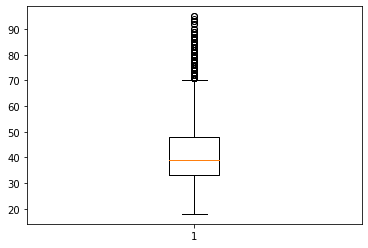

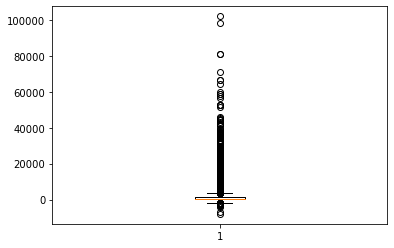

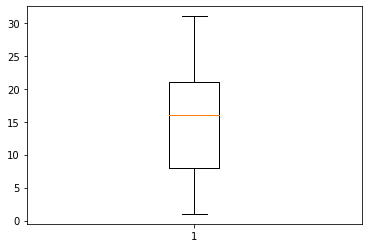

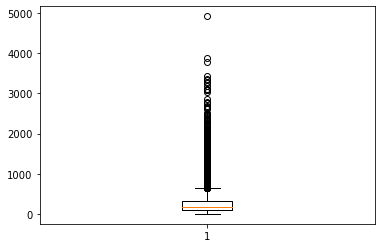

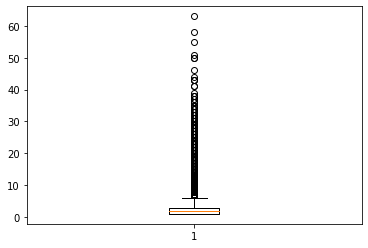

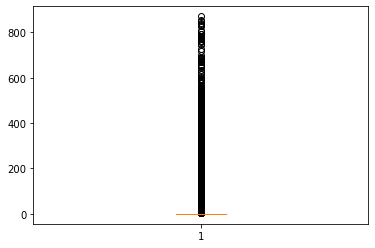

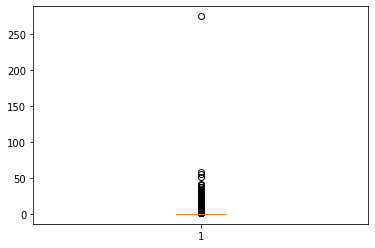

In [24]:
num =['age','balance','day','duration','campaign','pdays','previous']
for i in num:
    #print("Column",i)
    plt.boxplot(df[i])
    plt.show()

In [25]:
X= df.drop(columns = ['y'], axis=1)
y= df['y']
print(X.shape)
print(y.shape)

(45211, 30)
(45211,)


# Standarisation

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# LDA

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Create and run an LDA
lda = LDA(n_components=None)
X_lda = lda.fit(X, y)

# Create array of explained variance ratios
lda_var_ratios = lda.explained_variance_ratio_

# Create a function
def select_n_components(var_ratio, goal_var: float) -> int:
    # Set initial variance explained so far
    total_variance = 0.0
    
    # Set initial number of features
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        
        # Add the explained variance to the total
        total_variance += explained_variance
        
        # Add one to the number of components
        n_components += 1
        
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break
            
    # Return the number of components
    return n_components

select_n_components(lda_var_ratios, 0.90)

1

 # PCA

Text(0, 0.5, 'cumulative explained variance')

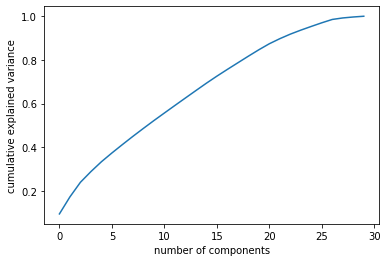

In [28]:
from sklearn.decomposition import PCA

pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

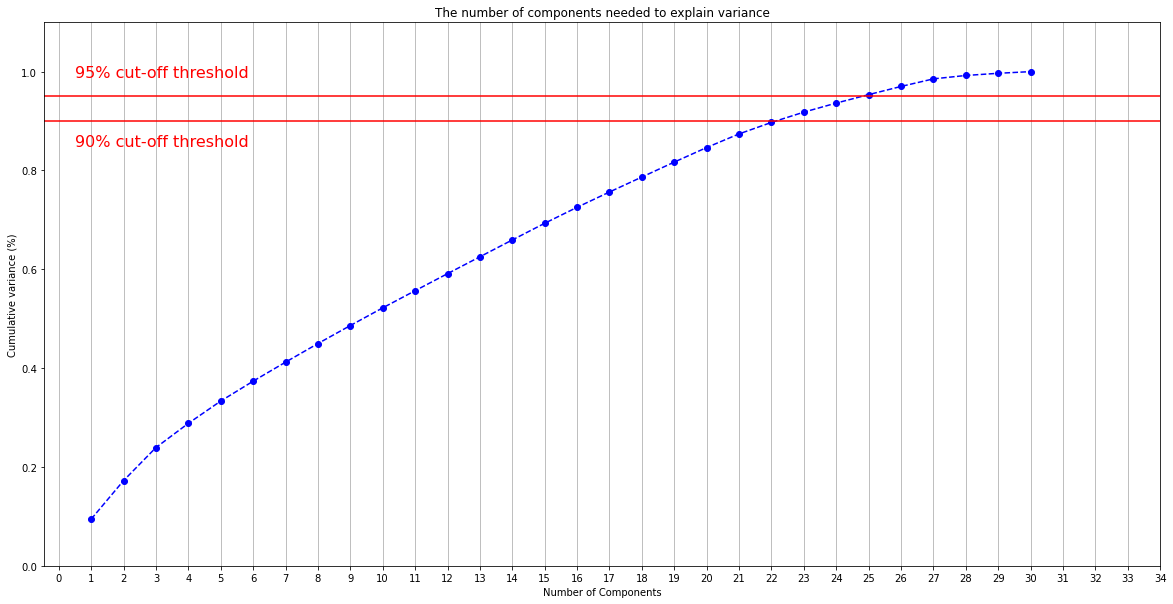

In [31]:
plt.rcParams["figure.figsize"] = (20,10)

fig, ax = plt.subplots()
xi = np.arange(1, 31, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 35, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.99, '95% cut-off threshold', color = 'red', fontsize=16)

plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(0.5, 0.85, '90% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()


#60 - 90%
#65 - 95%

In [32]:
#90%

pca = PCA(n_components=22)
X = pca.fit_transform(X)

# CLASS IMBALANCE 

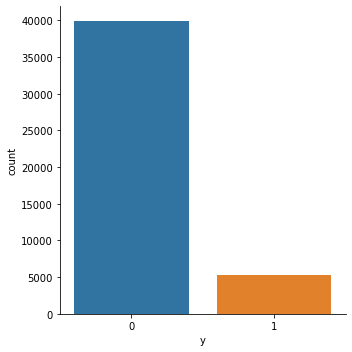

In [33]:
sns.catplot(x='y',kind = 'count',data= df)

In [34]:
response_yes = df[df['y']==1]
response_no = df[df['y']==0]

print(response_yes.shape,response_no.shape)

(5289, 31) (39922, 31)


In [35]:
### OVERSAMPLING

# instantiating the random over sampler 
ros = RandomOverSampler()
# resampling X, y
X_ros, y_ros = ros.fit_resample(X, y)
# new class distribution 
print(Counter(y_ros))

Counter({0: 39922, 1: 39922})


In [36]:
## UNDERSAMPLING

# instantiating the random undersampler
rus = RandomUnderSampler() 
# resampling X, y
X_rus, y_rus = rus.fit_resample(X, y)
# new class distribution
print(Counter(y_rus))

Counter({0: 5289, 1: 5289})


In [37]:
### Combined OVER AND UNDERSAMPLING

# instantiating over and under sampler
over = RandomOverSampler(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.9)


# first performing oversampling to minority class
X_over, y_over = over.fit_resample(X, y)
print(f"Oversampled: {Counter(y_over)}")


# now to comine under sampling 
X_combined_sampling, y_combined_sampling = under.fit_resample(X_over, y_over)
print(f"Combined Random Sampling: {Counter(y_combined_sampling)}")

Oversampled: Counter({0: 39922, 1: 31937})
Combined Random Sampling: Counter({0: 35485, 1: 31937})


In [38]:
## SMOTE

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 42)

X_sm, y_sm = sm.fit_resample(X,y)
print(f"SMOTE Sampling: {Counter(y_sm)}")

SMOTE Sampling: Counter({0: 39922, 1: 39922})


In [39]:
## SMOTETomelek

from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
# pip install scikit-learn==0.23.1
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_smk,y_smk=smk.fit_resample(X,y)
print(f"SMOTETomek Sampling: {Counter(y_smk)}")

SMOTETomek Sampling: Counter({0: 39780, 1: 39780})


# ML MODELLING

In [40]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve
import time


plt.rcParams["figure.figsize"] = (5,5)
def result(model):

    X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.33, random_state=42)
    start = time.time()
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    end = time.time()
    print("\n Oversampled Data\n",accuracy_score(y_test,pred))
    print(classification_report(y_test,pred))
    print(confusion_matrix(y_test,pred))
    cm = confusion_matrix(y_test, pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot()
    plt.show()
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr,tpr,threshold = metrics.roc_curve(y_test,preds)
    roc_auc = metrics.auc(fpr,tpr)
    print('ROC AUC=%.3f' % (roc_auc))
    print("\nTime Taken :"+ str(end - start) +" seconds")
    
    X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.33, random_state=42)
    start = time.time()
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    end = time.time()
    print("\n Undersampled Data\n",accuracy_score(y_test,pred))
    print(classification_report(y_test,pred))
    print(confusion_matrix(y_test,pred))
    cm = confusion_matrix(y_test, pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot()
    plt.show()
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr,tpr,threshold = metrics.roc_curve(y_test,preds)
    roc_auc = metrics.auc(fpr,tpr)
    print('ROC AUC=%.3f' % (roc_auc))
    print("\nTime Taken :"+ str(end - start) +" seconds")
    
    X_train, X_test, y_train, y_test = train_test_split(X_combined_sampling, y_combined_sampling, test_size=0.33, random_state=42)
    start = time.time()
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    end = time.time()
    print("\n Combined Sampling Data\n",accuracy_score(y_test,pred))
    print(classification_report(y_test,pred))
    print(confusion_matrix(y_test,pred))
    cm = confusion_matrix(y_test, pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot()
    plt.show()
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr,tpr,threshold = metrics.roc_curve(y_test,preds)
    roc_auc = metrics.auc(fpr,tpr)
    print('ROC AUC=%.3f' % (roc_auc))
    print("\nTime Taken :"+ str(end - start) +" seconds")
    
    X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.33, random_state=42)
    start = time.time()
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    end = time.time()
    print("\n SMOTE Data\n",accuracy_score(y_test,pred))
    print(classification_report(y_test,pred))
    print(confusion_matrix(y_test,pred))
    cm = confusion_matrix(y_test, pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot()
    plt.show()
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr,tpr,threshold = metrics.roc_curve(y_test,preds)
    roc_auc = metrics.auc(fpr,tpr)
    print('ROC AUC=%.3f' % (roc_auc))
    print("\nTime Taken :"+ str(end - start) +" seconds")
    
    X_train, X_test, y_train, y_test = train_test_split(X_smk, y_smk, test_size=0.33, random_state=42)
    start = time.time()
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    end = time.time()
    print("\n SMOTETomek Data\n",accuracy_score(y_test,pred))
    print(classification_report(y_test,pred))
    print(confusion_matrix(y_test,pred))
    cm = confusion_matrix(y_test, pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot()
    plt.show()
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr,tpr,threshold = metrics.roc_curve(y_test,preds)
    roc_auc = metrics.auc(fpr,tpr)
    print('ROC AUC=%.3f' % (roc_auc))
    print("\nTime Taken :"+ str(end - start) +" seconds")


 Oversampled Data
 0.882044859387453
              precision    recall  f1-score   support

           0       0.92      0.84      0.88     13163
           1       0.85      0.92      0.89     13186

    accuracy                           0.88     26349
   macro avg       0.88      0.88      0.88     26349
weighted avg       0.88      0.88      0.88     26349

[[11048  2115]
 [  993 12193]]


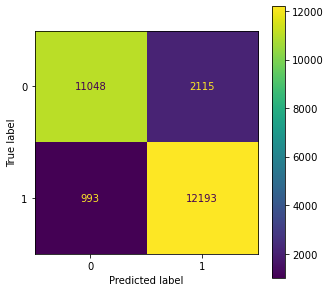

ROC AUC=0.942

Time Taken :29.186859846115112 seconds

 Undersampled Data
 0.7665425379547408
              precision    recall  f1-score   support

           0       0.74      0.83      0.78      1783
           1       0.80      0.70      0.74      1708

    accuracy                           0.77      3491
   macro avg       0.77      0.77      0.76      3491
weighted avg       0.77      0.77      0.77      3491

[[1486  297]
 [ 518 1190]]


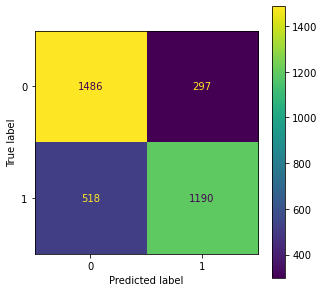

ROC AUC=0.849

Time Taken :0.6806497573852539 seconds

 Combined Sampling Data
 0.8595056179775281
              precision    recall  f1-score   support

           0       0.88      0.85      0.86     11687
           1       0.84      0.87      0.85     10563

    accuracy                           0.86     22250
   macro avg       0.86      0.86      0.86     22250
weighted avg       0.86      0.86      0.86     22250

[[9922 1765]
 [1361 9202]]


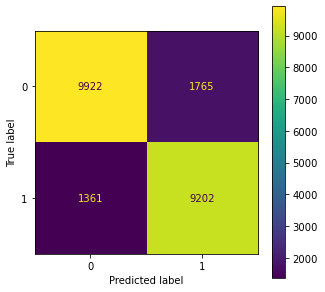

ROC AUC=0.934

Time Taken :24.161656141281128 seconds

 SMOTE Data
 0.9028805647273141
              precision    recall  f1-score   support

           0       0.96      0.84      0.90     13163
           1       0.86      0.96      0.91     13186

    accuracy                           0.90     26349
   macro avg       0.91      0.90      0.90     26349
weighted avg       0.91      0.90      0.90     26349

[[11114  2049]
 [  510 12676]]


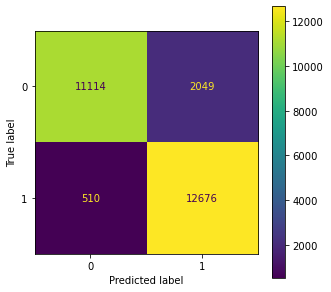

ROC AUC=0.956

Time Taken :28.5450177192688 seconds

 SMOTETomek Data
 0.9035993144163017
              precision    recall  f1-score   support

           0       0.96      0.85      0.90     13148
           1       0.86      0.96      0.91     13107

    accuracy                           0.90     26255
   macro avg       0.91      0.90      0.90     26255
weighted avg       0.91      0.90      0.90     26255

[[11123  2025]
 [  506 12601]]


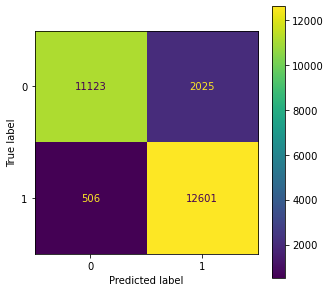

ROC AUC=0.956

Time Taken :28.518957376480103 seconds


In [41]:
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)

result(knn)


 Oversampled Data
 0.8087593457057194
              precision    recall  f1-score   support

           0       0.79      0.84      0.81     13163
           1       0.83      0.78      0.80     13186

    accuracy                           0.81     26349
   macro avg       0.81      0.81      0.81     26349
weighted avg       0.81      0.81      0.81     26349

[[10996  2167]
 [ 2872 10314]]


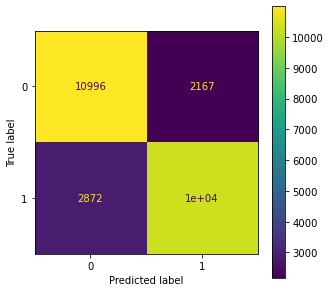

ROC AUC=0.889

Time Taken :0.07303690910339355 seconds

 Undersampled Data
 0.806932111142939
              precision    recall  f1-score   support

           0       0.79      0.84      0.82      1783
           1       0.82      0.77      0.80      1708

    accuracy                           0.81      3491
   macro avg       0.81      0.81      0.81      3491
weighted avg       0.81      0.81      0.81      3491

[[1504  279]
 [ 395 1313]]


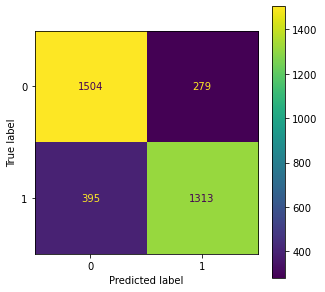

ROC AUC=0.893

Time Taken :0.009992122650146484 seconds

 Combined Sampling Data
 0.8086292134831461
              precision    recall  f1-score   support

           0       0.80      0.85      0.82     11687
           1       0.82      0.76      0.79     10563

    accuracy                           0.81     22250
   macro avg       0.81      0.81      0.81     22250
weighted avg       0.81      0.81      0.81     22250

[[9935 1752]
 [2506 8057]]


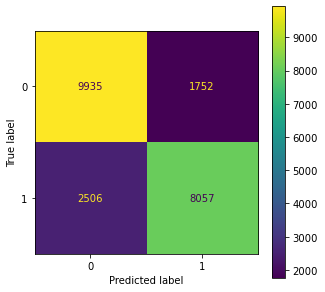

ROC AUC=0.890

Time Taken :0.06201052665710449 seconds

 SMOTE Data
 0.8120232266879198
              precision    recall  f1-score   support

           0       0.80      0.83      0.82     13163
           1       0.83      0.79      0.81     13186

    accuracy                           0.81     26349
   macro avg       0.81      0.81      0.81     26349
weighted avg       0.81      0.81      0.81     26349

[[10964  2199]
 [ 2754 10432]]


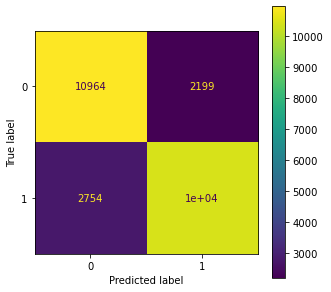

ROC AUC=0.894

Time Taken :0.07803726196289062 seconds

 SMOTETomek Data
 0.8161112169110646
              precision    recall  f1-score   support

           0       0.80      0.84      0.82     13148
           1       0.83      0.80      0.81     13107

    accuracy                           0.82     26255
   macro avg       0.82      0.82      0.82     26255
weighted avg       0.82      0.82      0.82     26255

[[11000  2148]
 [ 2680 10427]]


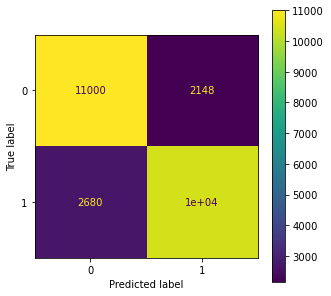

ROC AUC=0.897

Time Taken :0.075042724609375 seconds


In [42]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = 0)
result(log)


 Oversampled Data
 0.7002542790997761
              precision    recall  f1-score   support

           0       0.66      0.82      0.73     13163
           1       0.77      0.58      0.66     13186

    accuracy                           0.70     26349
   macro avg       0.71      0.70      0.70     26349
weighted avg       0.71      0.70      0.70     26349

[[10827  2336]
 [ 5562  7624]]


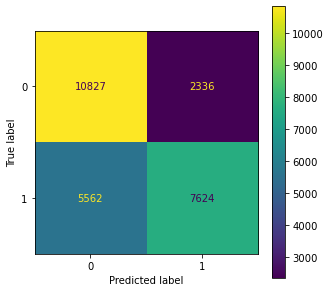

ROC AUC=0.806

Time Taken :0.03800821304321289 seconds

 Undersampled Data
 0.6877685476940705
              precision    recall  f1-score   support

           0       0.66      0.82      0.73      1783
           1       0.74      0.55      0.63      1708

    accuracy                           0.69      3491
   macro avg       0.70      0.68      0.68      3491
weighted avg       0.70      0.69      0.68      3491

[[1460  323]
 [ 767  941]]


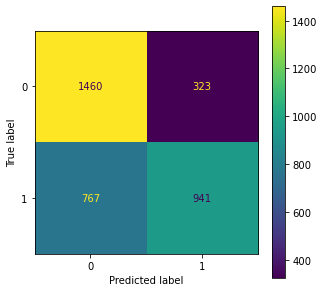

ROC AUC=0.795

Time Taken :0.004003286361694336 seconds

 Combined Sampling Data
 0.7070561797752809
              precision    recall  f1-score   support

           0       0.68      0.84      0.75     11687
           1       0.76      0.56      0.65     10563

    accuracy                           0.71     22250
   macro avg       0.72      0.70      0.70     22250
weighted avg       0.72      0.71      0.70     22250

[[9797 1890]
 [4628 5935]]


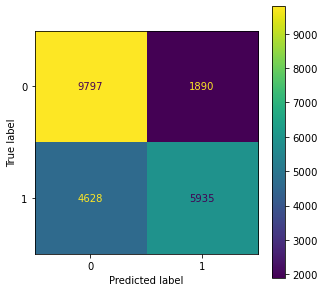

ROC AUC=0.811

Time Taken :0.03200864791870117 seconds

 SMOTE Data
 0.6972940149531291
              precision    recall  f1-score   support

           0       0.66      0.83      0.73     13163
           1       0.77      0.57      0.65     13186

    accuracy                           0.70     26349
   macro avg       0.71      0.70      0.69     26349
weighted avg       0.71      0.70      0.69     26349

[[10864  2299]
 [ 5677  7509]]


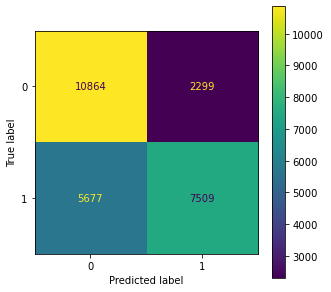

ROC AUC=0.809

Time Taken :0.036009788513183594 seconds

 SMOTETomek Data
 0.7068748809750524
              precision    recall  f1-score   support

           0       0.66      0.84      0.74     13148
           1       0.78      0.57      0.66     13107

    accuracy                           0.71     26255
   macro avg       0.72      0.71      0.70     26255
weighted avg       0.72      0.71      0.70     26255

[[11031  2117]
 [ 5579  7528]]


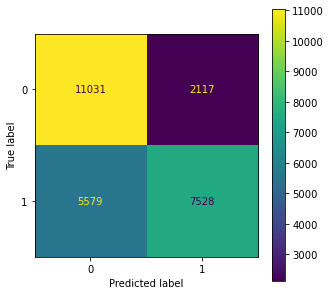

ROC AUC=0.819

Time Taken :0.03701019287109375 seconds


In [43]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
result(nb)


 Oversampled Data
 0.9672473338646628
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     13163
           1       0.94      1.00      0.97     13186

    accuracy                           0.97     26349
   macro avg       0.97      0.97      0.97     26349
weighted avg       0.97      0.97      0.97     26349

[[12329   834]
 [   29 13157]]


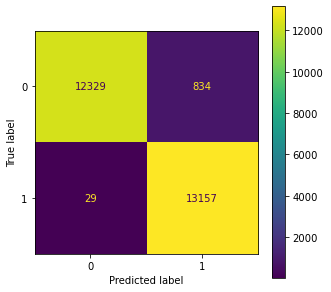

ROC AUC=0.999

Time Taken :23.34245538711548 seconds

 Undersampled Data
 0.8135204812374678
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1783
           1       0.81      0.81      0.81      1708

    accuracy                           0.81      3491
   macro avg       0.81      0.81      0.81      3491
weighted avg       0.81      0.81      0.81      3491

[[1463  320]
 [ 331 1377]]


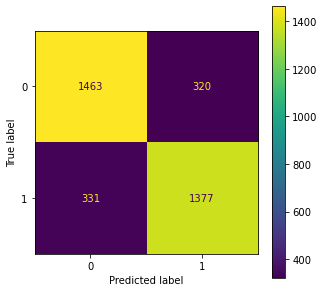

ROC AUC=0.893

Time Taken :2.617361068725586 seconds

 Combined Sampling Data
 0.9624719101123596
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     11687
           1       0.93      0.99      0.96     10563

    accuracy                           0.96     22250
   macro avg       0.96      0.96      0.96     22250
weighted avg       0.96      0.96      0.96     22250

[[10905   782]
 [   53 10510]]


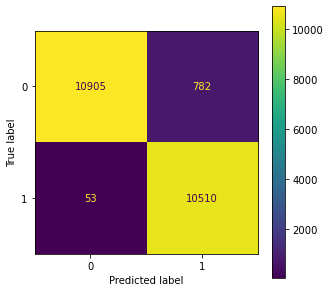

ROC AUC=0.997

Time Taken :20.123586416244507 seconds

 SMOTE Data
 0.924247599529394
              precision    recall  f1-score   support

           0       0.95      0.89      0.92     13163
           1       0.90      0.96      0.93     13186

    accuracy                           0.92     26349
   macro avg       0.93      0.92      0.92     26349
weighted avg       0.93      0.92      0.92     26349

[[11748  1415]
 [  581 12605]]


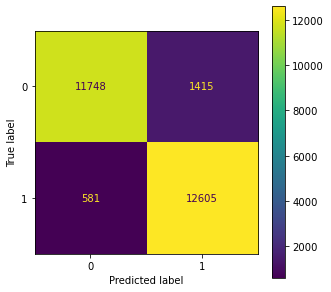

ROC AUC=0.978

Time Taken :28.74104952812195 seconds

 SMOTETomek Data
 0.9280137116739668
              precision    recall  f1-score   support

           0       0.96      0.89      0.93     13148
           1       0.90      0.96      0.93     13107

    accuracy                           0.93     26255
   macro avg       0.93      0.93      0.93     26255
weighted avg       0.93      0.93      0.93     26255

[[11766  1382]
 [  508 12599]]


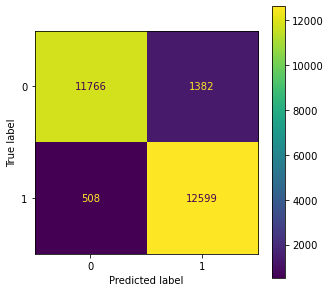

ROC AUC=0.979

Time Taken :28.525774240493774 seconds


In [44]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
rf = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')

result(rf)

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X_smk, y_smk, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.79 (+/- 0.04) [Logistic Regression]
Accuracy: 0.87 (+/- 0.05) [Random Forest]
Accuracy: 0.68 (+/- 0.05) [naive Bayes]
Accuracy: 0.81 (+/- 0.04) [Ensemble]


In [46]:
param_grid = {
    'bootstrap': [True,False],
    'max_depth': [None, 80, 90, 100, 110],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [100, 200, 300, 1000]
}

In [47]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True,False],
    'max_depth': [None, 80, 90, 100, 110],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [ 100, 200, 300, 400, 500]
}


# Create a based model
rf2 = RandomForestClassifier()
#Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf2, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.33, random_state=42)
start = time.time()
grid_search.fit(X_train, y_train)
end = time.time()
print("\nTime Taken :"+ str(end - start) +" seconds")


Fitting 3 folds for each of 900 candidates, totalling 2700 fits

Time Taken :12702.351926088333 seconds


In [48]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 80,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [49]:
grid_search.best_score_

0.9628563556661129

In [50]:
 rf_ht = RandomForestClassifier(bootstrap = False,     
                               max_features ='sqrt',
                             max_depth= 80,
                            min_samples_leaf= 1,
                               min_samples_split= 2,
                               n_estimators = 100)
start = time.time()
rf_ht.fit(X_train, y_train)
pred = rf_ht.predict(X_test)

end = time.time()

In [51]:
print("\n Random Forest Hypertuned OverSampled Data\n",accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

probs = rf_ht.predict_proba(X_test)
preds = probs[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test,preds)
roc_auc = metrics.auc(fpr,tpr)
print('ROC AUC=%.3f' % (roc_auc))
print("\nTime Taken :"+ str(end - start) +" seconds")


 Random Forest Hypertuned OverSampled Data
 0.9781395878401458
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     13163
           1       0.96      1.00      0.98     13186

    accuracy                           0.98     26349
   macro avg       0.98      0.98      0.98     26349
weighted avg       0.98      0.98      0.98     26349

[[12622   541]
 [   35 13151]]
ROC AUC=0.999

Time Taken :54.49670958518982 seconds
